
# Mobile Big Data Analytics and Management
# Assignment 1: 
# Research Objective: 
# AndrewID: iguygael
# Date: 03/02/2026


#Assignment 1

##Assignment Overview

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# I initialize bold settings which I will use in my print statements for better readability
# initializing bold and end to make our print messages bold 
BOLD = '\033[1m'
END = '\033[0m'

## TASK 1: Load and Merge data

In [4]:
import zipfile
import os

zip_path = "../data/raw/mobile-phone-activity.zip"
extract_path = "../data/raw/mobile_phone_activity"

# Create target directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"{BOLD}Dataset successfully unzipped to:{END}", extract_path)


Dataset successfully unzipped to: ../data/raw/mobile_phone_activity


In [5]:
import os

os.listdir("../data/raw/mobile_phone_activity")


['ISTAT_census_variables_2011.csv',
 'Italian_provinces.geojson',
 'mi-to-provinces-2013-11-01.csv',
 'mi-to-provinces-2013-11-02.csv',
 'mi-to-provinces-2013-11-03.csv',
 'mi-to-provinces-2013-11-04.csv',
 'mi-to-provinces-2013-11-05.csv',
 'mi-to-provinces-2013-11-06.csv',
 'mi-to-provinces-2013-11-07.csv',
 'milano-grid.geojson',
 'sms-call-internet-mi-2013-11-01.csv',
 'sms-call-internet-mi-2013-11-02.csv',
 'sms-call-internet-mi-2013-11-03.csv',
 'sms-call-internet-mi-2013-11-04.csv',
 'sms-call-internet-mi-2013-11-05.csv',
 'sms-call-internet-mi-2013-11-06.csv',
 'sms-call-internet-mi-2013-11-07.csv']

In [6]:
files = [
    "sms-call-internet-mi-2013-11-02.csv",
    "sms-call-internet-mi-2013-11-04.csv",
    "sms-call-internet-mi-2013-11-06.csv"
]

datasets = [pd.read_csv(f"../data/raw/mobile_phone_activity/{f}") for f in files]

combined_datasets = pd.concat(datasets, ignore_index=True)
print(f"{BOLD}Combined dataset{END}")
display(combined_datasets)

Combined dataset


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933
...,...,...,...,...,...,...,...,...
6564026,2013-11-06 23:00:00,10000,32,NaN,NaN,NaN,NaN,0.0860
6564027,2013-11-06 23:00:00,10000,34,0.5160,0.4300,NaN,NaN,NaN
6564028,2013-11-06 23:00:00,10000,39,4.5423,4.8837,0.9010,0.2675,101.0942
6564029,2013-11-06 23:00:00,10000,41,NaN,NaN,0.0860,NaN,NaN


# Task 2.


# 2.1.  Handling missing values using mean

In [7]:
# lets first check missing values in the dataset
print(f"{BOLD}Total missing values per column{END}")
display(combined_datasets.isna().sum())

# now lets use mean interpolation to handle missing values
combined_dataset=combined_datasets.fillna(combined_datasets.mean(numeric_only=True)) # we use numeric_only=True for compatibility
print(f"{BOLD} The filled in dataset after mean interpolation to handle missing values:{END}")
display(combined_dataset)


Total missing values per column


datetime             0
CellID               0
countrycode          0
smsin          3964171
smsout         5025738
callin         4761685
callout        3764484
internet       3621117
dtype: int64

 The filled in dataset after mean interpolation to handle missing values:


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.244500,7.440751,7.738604,5.686694,101.976153
1,2013-11-02 00:00:00,1,39,1.495200,1.121300,0.270800,0.300400,46.509400
2,2013-11-02 00:00:00,1,53,0.001800,0.003600,7.738604,5.686694,101.976153
3,2013-11-02 00:00:00,2,0,0.245800,7.440751,7.738604,5.686694,101.976153
4,2013-11-02 00:00:00,2,39,1.502800,1.124300,0.275100,0.302300,46.693300
...,...,...,...,...,...,...,...,...
6564026,2013-11-06 23:00:00,10000,32,7.861976,7.440751,7.738604,5.686694,0.086000
6564027,2013-11-06 23:00:00,10000,34,0.516000,0.430000,7.738604,5.686694,101.976153
6564028,2013-11-06 23:00:00,10000,39,4.542300,4.883700,0.901000,0.267500,101.094200
6564029,2013-11-06 23:00:00,10000,41,7.861976,7.440751,0.086000,5.686694,101.976153


# 2.2. Feature Engineering to add aggregrate columns

In [8]:
# Let's add aggregate activity columns
combined_dataset["total_sms"] = combined_dataset["smsin"] + combined_dataset["smsout"]
combined_dataset["total_calls"] = combined_dataset["callin"] + combined_dataset["callout"]
combined_dataset["total_internet"] = combined_dataset["internet"]

print(f"{BOLD}The clean and ready dataset with missing values handled and feature engineering: {END}")

display(combined_dataset)



The clean and ready dataset with missing values handled and feature engineering: 


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,total_sms,total_calls,total_internet
0,2013-11-02 00:00:00,1,0,0.244500,7.440751,7.738604,5.686694,101.976153,7.685251,13.425298,101.976153
1,2013-11-02 00:00:00,1,39,1.495200,1.121300,0.270800,0.300400,46.509400,2.616500,0.571200,46.509400
2,2013-11-02 00:00:00,1,53,0.001800,0.003600,7.738604,5.686694,101.976153,0.005400,13.425298,101.976153
3,2013-11-02 00:00:00,2,0,0.245800,7.440751,7.738604,5.686694,101.976153,7.686551,13.425298,101.976153
4,2013-11-02 00:00:00,2,39,1.502800,1.124300,0.275100,0.302300,46.693300,2.627100,0.577400,46.693300
...,...,...,...,...,...,...,...,...,...,...,...
6564026,2013-11-06 23:00:00,10000,32,7.861976,7.440751,7.738604,5.686694,0.086000,15.302728,13.425298,0.086000
6564027,2013-11-06 23:00:00,10000,34,0.516000,0.430000,7.738604,5.686694,101.976153,0.946000,13.425298,101.976153
6564028,2013-11-06 23:00:00,10000,39,4.542300,4.883700,0.901000,0.267500,101.094200,9.426000,1.168500,101.094200
6564029,2013-11-06 23:00:00,10000,41,7.861976,7.440751,0.086000,5.686694,101.976153,15.302728,5.772694,101.976153


# Questions

# Q1)  How many total records across all 3 datasets? (10)

In [9]:
# lets check the total number of records in the combined dataset
total_records = combined_dataset.shape[0]

print(f"{BOLD}Total number of records across all 3 datasets:{END}", total_records)


Total number of records across all 3 datasets: 6564031


 # Q2) How many unique grid squares (CellID) are there? (5)

In [10]:
# lets check the number of unique grid squares (CellID)
unique_cells = combined_dataset["CellID"].nunique()

print(f"{BOLD}Number of unique grid squares (CellID):{END}", unique_cells)


Number of unique grid squares (CellID): 10000


# Q3) How many unique country codes appear in the data? (5)

In [11]:
# lets check the number of unique country codes in the dataset
unique_country_codes = combined_dataset["countrycode"].nunique()

print(f"{BOLD}Number of unique country codes:{END}", unique_country_codes)


Number of unique country codes: 302


# Q4) Are there any missing values?

Q4.1 For which columns are missing values most common? (5)

In [12]:
# lets first check missing values in the dataset
print(f"{BOLD}Total missing values per column{END}")
display(combined_datasets.isna().sum())
# lets identify which columns have the most missing values
missing_values = combined_datasets.isna().sum()

most_missing = missing_values[missing_values > 0].sort_values(ascending=False)

print(f"{BOLD}Columns where missing values are most common:{END}")
display(most_missing)



Total missing values per column


datetime             0
CellID               0
countrycode          0
smsin          3964171
smsout         5025738
callin         4761685
callout        3764484
internet       3621117
dtype: int64

Columns where missing values are most common:


smsout      5025738
callin      4761685
smsin       3964171
callout     3764484
internet    3621117
dtype: int64

Q.4.2. How many records did you modify? (5)

In [13]:
# lets calculate how many rows originally contained at least one missing value
modified_records = combined_datasets.isna().any(axis=1).sum()

print(f"{BOLD}Number of records modified during missing value handling:{END}", modified_records)


Number of records modified during missing value handling: 5880441


# Q5) Peak hour analysis

In [14]:
# lets extract the hour from the datetime column for time-based analysis
combined_dataset["hour"] = pd.to_datetime(combined_dataset["datetime"]).dt.hour


Q5.1 What is the most common peak hour across all grids? (5)

In [15]:
# lets compute the hour with the highest total call activity
peak_hour = combined_dataset.groupby("hour")["total_calls"].sum().idxmax()

print(f"{BOLD}Most common peak hour across all grids:{END}", peak_hour)


Most common peak hour across all grids: 17


Q5.2 What hour has the lowest activity? (5)

In [16]:
# lets compute the hour with the lowest total call activity
lowest_activity_hour = combined_dataset.groupby("hour")["total_calls"].sum().idxmin()

print(f"{BOLD}Hour with the lowest activity:{END}", lowest_activity_hour)


Hour with the lowest activity: 3


Q5.3 Hourly statistics for total calls (15)

Hourly descriptive statistics for total calls:


,mean,std,min,Median,max
hour,,,,,
0,10.280157,5.279040,0.0002,13.425298,223.4941
1,9.928661,5.129893,0.0000,13.425298,141.9847
2,9.894713,5.329786,0.0000,13.425298,210.9691
3,9.953373,5.649571,0.0000,13.425298,298.3541
4,10.235666,5.294288,0.0000,13.425298,255.0555
5,10.029019,5.395003,0.0000,13.425298,177.1690
6,10.339697,4.969421,0.0002,13.425298,201.3488
7,11.464472,8.435423,0.0000,13.425298,412.7314
8,13.272816,22.237365,0.0000,13.425298,1122.7091


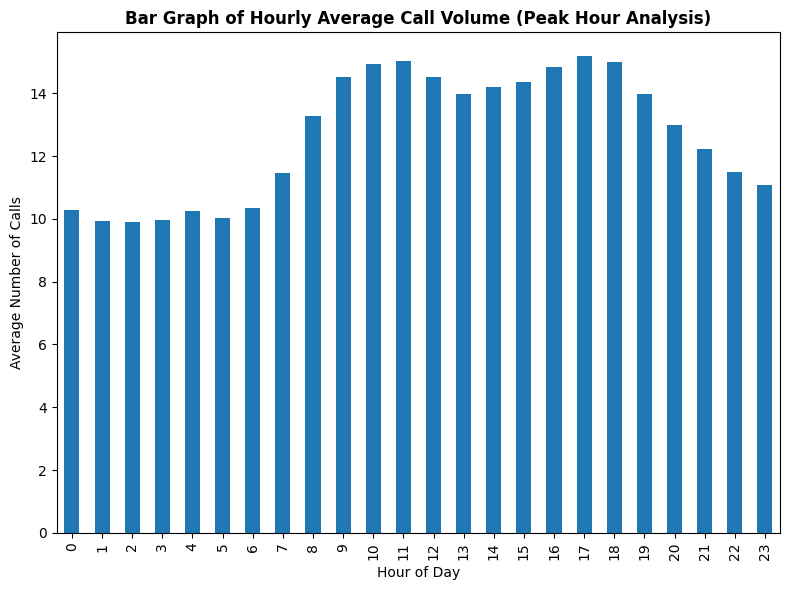

In [17]:
# lets compute descriptive statistics for total calls grouped by hour using describe() function
hourly_call_stats = combined_dataset.groupby("hour")["total_calls"].describe().rename(columns={"50%": "Median"}).drop(columns=["count", "25%", "75%"])
print(f"{BOLD}Hourly descriptive statistics for total calls:{END}")
display(hourly_call_stats)

# lets extract hourly average total calls from the describe() output
average_calls_hourly_stats = hourly_call_stats[["mean"]]

# now let plot the bar graph of hourly average call volumes
# this plot highlights peak call hours across the day
plt.figure(figsize=(8,6))
average_calls_hourly_stats["mean"].plot.bar()
plt.ylabel("Average Number of Calls")
plt.xlabel("Hour of Day")
plt.title("Bar Graph of Hourly Average Call Volume (Peak Hour Analysis)",fontweight="bold")
plt.tight_layout()
plt.show()



**Insights**

**17:00** is the main Peak Hour with the highest number of calls. Other busy hours are **11:00** and **18:00**. This shows that the midday and evening hours are the times when the most calls occur.

# Q6) Daytime vs Nighttime activity (5)

In [18]:
# defining daytime (6am–8pm) and nighttime (8pm–6am)
daytime_activity = combined_dataset[(combined_dataset["hour"] >= 6) & (combined_dataset["hour"] < 20)]["total_calls"].sum()

nighttime_activity = combined_dataset[(combined_dataset["hour"] < 6) | (combined_dataset["hour"] >= 20)]["total_calls"].sum()

total_activity = daytime_activity + nighttime_activity

daytime_percentage = (daytime_activity / total_activity) * 100
nighttime_percentage = (nighttime_activity / total_activity) * 100

print(f"{BOLD}Percentage of activity during daytime:{END} {daytime_percentage:.2f}%")
print(f"{BOLD}Percentage of activity during nighttime:{END} {nighttime_percentage:.2f}%")


Percentage of activity during daytime: 78.00%
Percentage of activity during nighttime: 22.00%


# Q7) Do international calls happen at different times than domestic? (5)

Average hourly domestic call activity:


hour
0      4.669291
1      3.253977
2      3.871361
3      4.357624
4      4.310516
5      3.076117
6      3.917451
7     14.715206
8     40.760643
9     65.336676
10    76.478743
11    79.314779
12    74.028499
13    63.978655
14    66.698597
15    69.299109
16    76.850111
17    82.472142
18    77.589839
19    61.464018
20    42.705835
21    27.333775
22    15.794976
23    10.197055
Name: total_calls, dtype: float64

Average hourly international call activity:


hour
0     11.680457
1     12.168112
2     12.339537
3     12.437824
4     12.529238
5     12.236029
6     11.684576
7     11.002251
8     10.410773
9      9.958970
10     9.643931
11     9.532941
12     9.520714
13     9.547252
14     9.527150
15     9.539143
16     9.470947
17     9.446846
18     9.513686
19     9.584367
20     9.829858
21    10.346058
22    10.852124
23    11.238586
Name: total_calls, dtype: float64

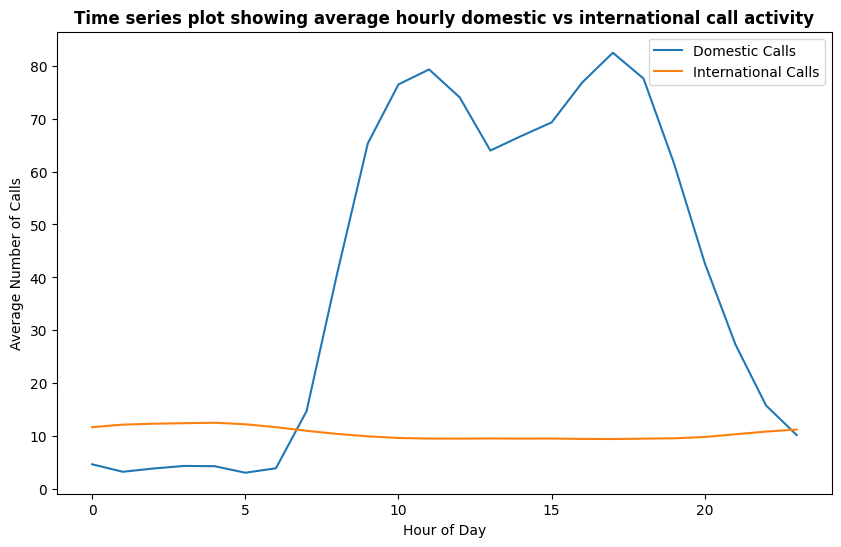

In [19]:
# Italy country code is 39
domestic_calls = combined_dataset[combined_dataset["countrycode"] == 39]
international_calls = combined_dataset[combined_dataset["countrycode"] != 39]

# lets compare average hourly call activity
domestic_hourly = domestic_calls.groupby("hour")["total_calls"].mean()
international_hourly = international_calls.groupby("hour")["total_calls"].mean()

print(f"{BOLD}Average hourly domestic call activity:{END}")
display(domestic_hourly)

print(f"{BOLD}Average hourly international call activity:{END}")
display(international_hourly)

# now lets do some visualization to see insights
plt.figure(figsize=(10, 6))
# let's plot using the index which are our hours from domestic_hourly and international_hourly
plt.plot(domestic_hourly.index, domestic_hourly, label='Domestic Calls')
plt.plot(international_hourly.index, international_hourly, label='International Calls')
plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Calls')
plt.title('Time series plot showing average hourly domestic vs international call activity', fontweight='bold')
plt.show()



**Insights**

Domestic calls reach their peak at **17:00**, unlike international calls which remain at **almost the same rate day and night**, indicating that they are not sensitive to domestic business hours.

# Q8) NumPy statistical comparison (5)

# Q8) Domestic vs International comparisons

Q8.1 Percentage of calls (5)

In [28]:
domestic_call_percentage = 100 * np.sum(domestic_calls["total_calls"]) / np.sum(combined_dataset["total_calls"])
international_call_percentage = 100 * np.sum(international_calls["total_calls"]) / np.sum(combined_dataset["total_calls"])

print(f"{BOLD}Domestic call percentage:{END} {domestic_call_percentage:.2f}%")
print(f"{BOLD}International call percentage:{END} {international_call_percentage:.2f}%")



Domestic call percentage: 33.11%
International call percentage: 66.89%


**Insight**

Approximately 67% of call traffic is international, showing that people in Milan communicate more via calls with contacts outside Italy. It shows that this city is an international one, where people are constantly talking on the phone with people from other countries for work or to visit friends and family.

Q8.2 Percentage of SMS (5)

In [24]:
domestic_sms_percentage = 100 * np.sum(domestic_calls["total_sms"]) / np.sum(combined_dataset["total_sms"])
international_sms_percentage = 100 * np.sum(international_calls["total_sms"]) / np.sum(combined_dataset["total_sms"])
print(f"{BOLD}Domestic SMS percentage:{END} {domestic_sms_percentage:.2f}%")
print(f"{BOLD}International SMS percentage:{END} {international_sms_percentage:.2f}%")


Domestic SMS percentage: 24.98%
International SMS percentage: 75.02%


**Insight**

About 75% of SMS traffic is international. This means that people in Milan use SMS a lot to communicate with people in other countries, because it is the easiest and cheapest way in such a large city.

Q8.3 Incoming vs outgoing international calls ratio (5)

In [27]:
# lets calculate the ratio of incoming to outgoing international calls
incoming_outgoing_ratio = np.sum(international_calls["callin"]) / np.sum(international_calls["callout"])

print(f"{BOLD}International incoming to outgoing call ratio:{END} {incoming_outgoing_ratio:.2f}")


International incoming to outgoing call ratio: 1.67


**Insight**

The fact that this ratio is 1.67 means that people in this city receive more calls from people outside the country than they make to people outside. It is possible that they prefer to receive calls because calling internationally is expensive, or they avoid making calls to people in different time zones.

Q8.4 Correlation between SMS and Call volume at grid level (5)

Pearson correlation between total SMS and total Calls (grid level): 0.986


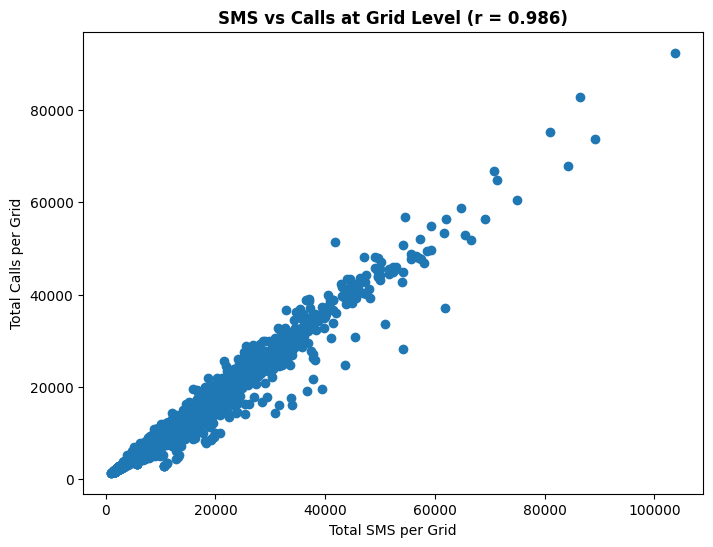

In [23]:
# We start by converting the required DataFrame columns to NumPy arrays

cell_ids = combined_dataset["CellID"].to_numpy()
total_sms = combined_dataset["total_sms"].to_numpy()
total_calls = combined_dataset["total_calls"].to_numpy()

# Aggregate data at the grid (CellID) level using NumPy
# First, we get unique CellIDs and an index mapping for aggregation
unique_cells, inverse_indices = np.unique(cell_ids, return_inverse=True)

sms_per_grid = np.zeros(len(unique_cells))
calls_per_grid = np.zeros(len(unique_cells))

# We use np.add.at to efficiently sum values per CellID
np.add.at(sms_per_grid, inverse_indices, total_sms)
np.add.at(calls_per_grid, inverse_indices, total_calls)

# Now we calculate the Pearson correlation coefficient between SMS and call volumes
pearson_corr = np.corrcoef(sms_per_grid, calls_per_grid)[0, 1]

print(f"{BOLD}Pearson correlation between total SMS and total Calls (grid level):{END} {pearson_corr:.3f}")

# Finally, lets visualize the relationship between SMS and Call volumes at the grid level
plt.figure(figsize=(8, 6))
plt.scatter(sms_per_grid, calls_per_grid)
plt.xlabel("Total SMS per Grid")
plt.ylabel("Total Calls per Grid")
plt.title(f"SMS vs Calls at Grid Level (r = {pearson_corr:.3f})", fontweight="bold")
plt.show()

**Insight**

This Pearson correlation coefficient shows a very strong positive relationship between total SMS and total Call volumes at the grid level, indicating that grid squares with higher SMS activity also tend to have higher call activity.